
**Agenda**
---

**Image Processing:**

*   OpenCV Basics (loading images, line drawing, resizing etc...)


*   Adding noise and removing noise (denoising) to digital images

*   Image masking
*   Edge detection


*   Contour detection


*   Morphology

**Object Detection:**



*   Intro and basics of object detection


*   Yolo V4 


---




















#### Prepere your environment:
- Install python from [here](https://www.python.org/downloads/).
- Install openCV for python by running the following command in your terminal:
    
    ```bash
    pip install opencv-python
    ```
---

**Now, what is image processing (digital image)?**

Image processing is a method to perform some operations on an image, in order to get an enhanced image or to extract some useful information from it.

In context to computer vision -

The aim of digital image processing is to improve the image data (features) by suppressing unwanted distortions and/or enhancement of some important image features so that our AI-Computer Vision models can benefit from this improved data to work on.

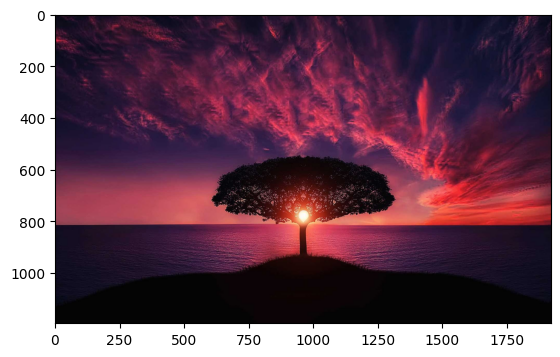

In [1]:
#Loading an image

import cv2
import matplotlib.pyplot as plt

path = "./input/test2.jpg"

img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# print(img)

# print(img.shape)

## using built in cv2.imshow function, which doesnt work in Colab

# window_name = "image"
# cv2.imshow(window_name, img)
# cv2.waitKey(0) #to avoid crashing 
# cv2.destroyAllWindows() 

plt.imshow(img)


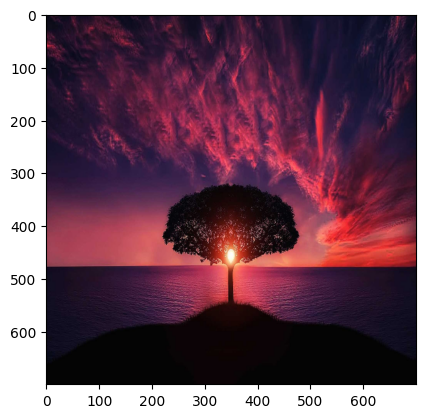

In [2]:
#Image resizing
resized_image = cv2.resize(img, (700, 700))
plt.imshow(resized_image)

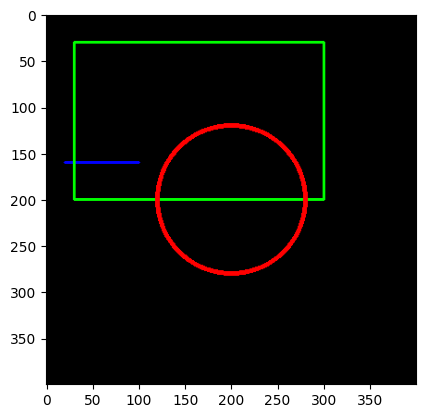

In [3]:
#Drawing basic shapes and lines

import numpy as np
img = np.zeros((400, 400, 3), dtype = "uint8")
# plt.imshow(img)

# cv2.line(image, (‘start_coordinates’), (‘end_coordinates’), (‘color_in_bgr’), ‘line_thickness’)
cv2.line(img, (20, 160), (100, 160), (0, 0, 255), 2)

# cv2.rectangle(image, (‘top_left_vertex_coordinates’), (‘lower_right_vertex_coordinates’), (‘color_in_bgr’), ‘line_thickness’)
cv2.rectangle(img, (30, 30), (300, 200), (0, 255, 0), 2)

# cv2.circle(image, (‘center_coordinates’), (‘circle_radius’), (‘color_in_bgr’), thickness’)
cv2.circle(img, (200, 200), 80, (255, 0, 0), 3)

plt.imshow(img)

**Adding noise** 

Why do we need noise?

Image Augmentation, makes DL models more robust

**Normal (Gaussian) distribution:**

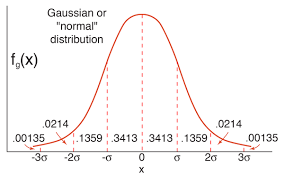

During measurement values will follow a normal distribution with an equal number of measurements above and below the mean value.

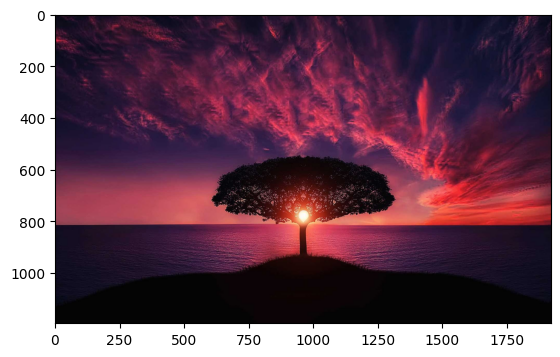

In [14]:
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt

# add noise to image
path = "./input/test2.jpg"
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


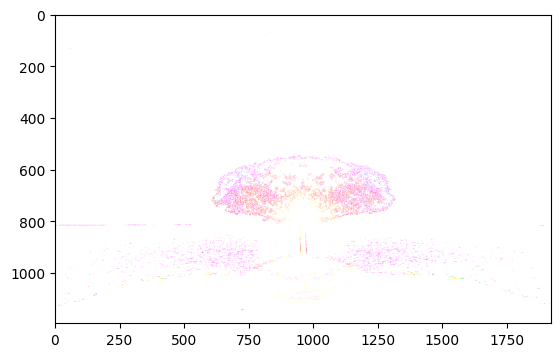

In [20]:
# gaussian noise
mean = 0
st = 0.7
gauss = np.random.normal(mean, st, img.shape)
gauss = gauss.reshape(img.shape)
# add gaussian noise to image
noisy = gauss + img

plt.imshow(noisy)

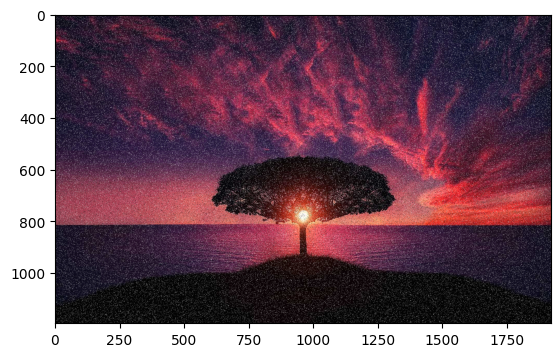

In [16]:
# salt and pepper noise
prob = 0.05
output = np.zeros(img.shape, np.uint8)
thres = 1 - prob
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        rdnum = random.random()
        if rdnum < prob:
            output[i][j] = 0
        elif rdnum > thres:
            output[i][j] = 255
        else:
            output[i][j] = img[i][j]

# display one by one separately
plt.imshow(output)


**HSV color space**

**H is Hue** - Hue, the color type (such as red, blue, or yellow)

**S is saturation** - Color saturation is the intensity and purity of a color as displayed in an image. The higher the saturation of a color, the more intense it is. The lower a color's saturation, the closer it is to pure gray on the grayscale.

**V is value** -Value refers to the relative lightness or darkness of a color.

**Image masking**

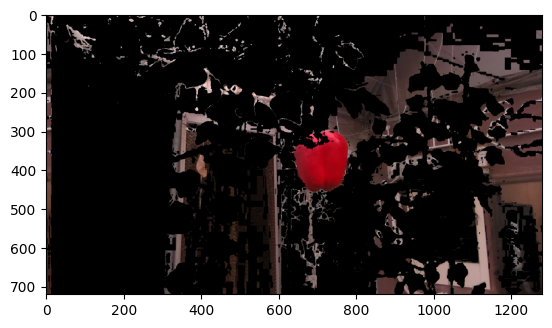

In [24]:
path = "./input/exercise1.jpg"


img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
# For RED, we can choose the HSV range (0,10,20) - (10,255,255) and (175,10,20) - (180,255,255)
mask1 = cv2.inRange(img_hsv, (0,10,20), (10,255,255)) #lower color regions for red in HSV color space


mask2 = cv2.inRange(img_hsv, (175,10,20), (180,255,255)) #upper color regions for red


mask = cv2.bitwise_or(mask1, mask2)

croped = cv2.bitwise_and(img, img, mask=mask)

# the above line shows only pixels in the image that have a corresponding white (255) value in the mask


plt.imshow(croped)

**Edge detection (canny edge detection)**



There are four steps under Canny edge detection:


*   Noise reduction (Gaussian smoothing)

*   Computing the gradient magnitude and orientation
*   Non-maxima suppression


*   Hysteresis thresholding / Edge Tracking by Hysteresis



**Gausian Blur:** We apply this technique to remove noise

**Computing gradient:**


*   Image gradient is defined as a directional change in imag intensity.
*   To put it in simple words, at each pixel of the input (grayscale) image, a gradient measures the change in pixel intensity in a given direction i.e X or Y.

**Non-maxima suppression:**



*   Ideally, the final image should have thin edges. So, we must perform non-maximum suppression to thin out the edges.
*   The principle behind this is, the algorithm goes through all the points on the gradient intensity matrix and finds the pixels with the maximum value in the edge directions.


**Hysteresis thresholding**

Based on the threshold results, the hysteresis process
consists of transforming weak pixels into strong ones, if and only if at least one of the pixels around the one being processed is a strong one.
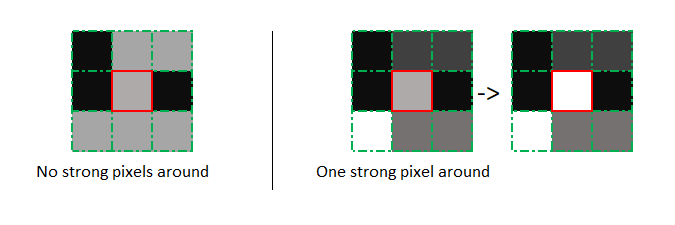









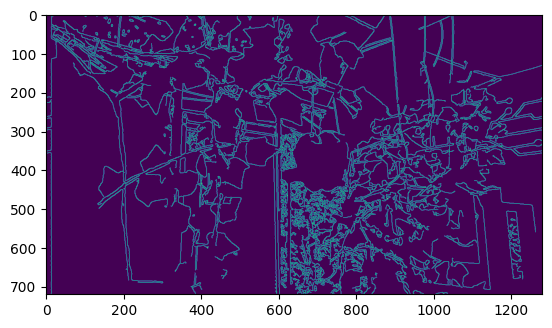

In [25]:

image = cv2.imread(path)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
wide = cv2.Canny(blurred, 10, 200) # cv2.Canny(image, low_tresh, high_tresh)
mid = cv2.Canny(blurred, 30, 150)
tight = cv2.Canny(blurred, 240, 250)
plt.imshow(mid)

**Contour detection**

A contour is a closed curve joining all the continuous points having some color or intensity, they represent the shapes of objects found in an image. 

**Why drawing contour?**

Contour detection is a useful technique for shape analysis and object detection and recognition.

**Why do we need this when we have edge detection?**



*   When we perform edge detection, we find the points where the intensity of colors changes significantly, and then we simply turn those pixels on.
*   but contours are abstract collections of points and segments corresponding to the shapes of the objects in the image



 



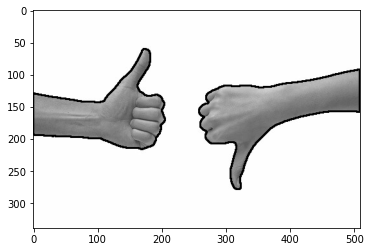

In [ ]:
img = cv2.imread("/content/drive/MyDrive/cvSession/Copy of thumbs_up_down.jpg")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# plt.imshow(img, cmap = "gray")

# binary image, which means each pixel of the image is either black or white. 
# this is necessary because finding contours is like finding a white object from a black background, 
# objects to be found should be white and the background should be black.

_ , binary = cv2.threshold(img, 225, 255, cv2.THRESH_BINARY_INV)

# The above line creates the binary image by setting to 0 pixels that have a value of less than 225 and 
# turning on (setting to 255) the pixels that has a value of more than 225, here is the output image:

# plt.imshow(binary, cmap="gray")

contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

image = cv2.drawContours(img, contours, -1, (0, 255, 0), 2)

plt.imshow(image, cmap="gray")

In [ ]:
# !pip install pytesseract

**Morphology**

Morphological operations are applied to grayscale or binary images and are used for preprocessing for OCR algorithms, detecting barcodes, detecting license plates, and more.

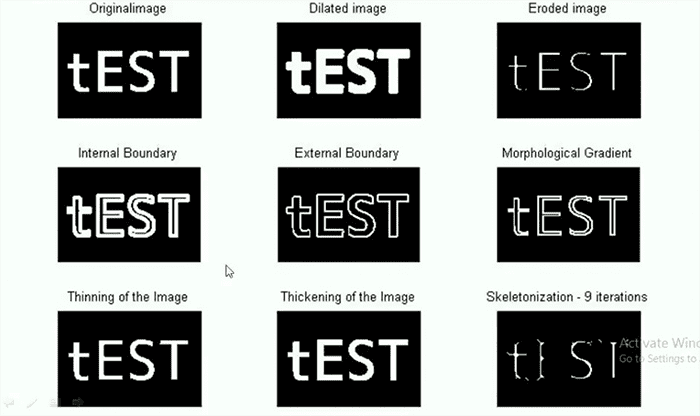

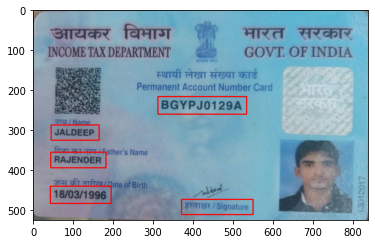

In [ ]:
# handson on morphology, edge detection and contours

# import pytesseract
import cv2
from PIL import Image
import numpy as np
import imutils
from imutils import contours
import matplotlib.pyplot as plt
# %matplotlib inline

img = cv2.imread("/content/drive/MyDrive/cvSession/img2.jpg")

img = imutils.resize(img, height = 519, width=838)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

copy = img
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 5))
# print(rectKernel)
sqKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
# print(sqKernel)

blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKernel)
# The first required argument of cv2.morphologyEx is the image we want to apply the morphological operation to. 
# The second argument is the actual type of morphological operation 
# The last required argument is the kernel/structuring element that we are using.

# The black-hat operation enhance dark objects of interest in a bright background.

# plt.imshow(blackhat,cmap = "gray")

gradx = cv2.Sobel(blackhat, ddepth=cv2.CV_32F, dx=1, dy=0,ksize=-1)

# Sobel method uses two kernels: 
# one for detecting horizontal changes and the other for detecting vertical changes

# plt.imshow(gradx,cmap = 'gray')
gradx = np.absolute(gradx)
(minVal, maxVal) = (np.min(gradx), np.max(gradx))
gradx = (255 * ((gradx - minVal) / (maxVal - minVal)))
gradx = gradx.astype("uint8")
gradx = cv2.morphologyEx(gradx, cv2.MORPH_CLOSE, rectKernel)
thresh = cv2.threshold(gradx, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, sqKernel)

cnts = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
locs = []

for c in cnts:
  if  cv2.contourArea(c) > 1000:
    (x, y, w, h) = cv2.boundingRect(c)
    ar = w / float(h)
    if ar > 5.5 and ar<9.1:
      locs.append((x, y, w, h))

for x,y,w,h in locs:
  image = cv2.rectangle(copy, (x-10, y-10), (x+w+10, y+h+10), (255, 0, 0), 2)
  plt.imshow(image, cmap = 'gray')
for x,y,w,h in locs:
        body = gray[y-10:y+h+10, x-10:x+w+10]
        # text = pytesseract.image_to_string(body)
        # print(text)

**Object Detection (YOLO V4)**

Classification vs Detection....

Detection and localization (bounding box)...

**First approach:** Sliding window method

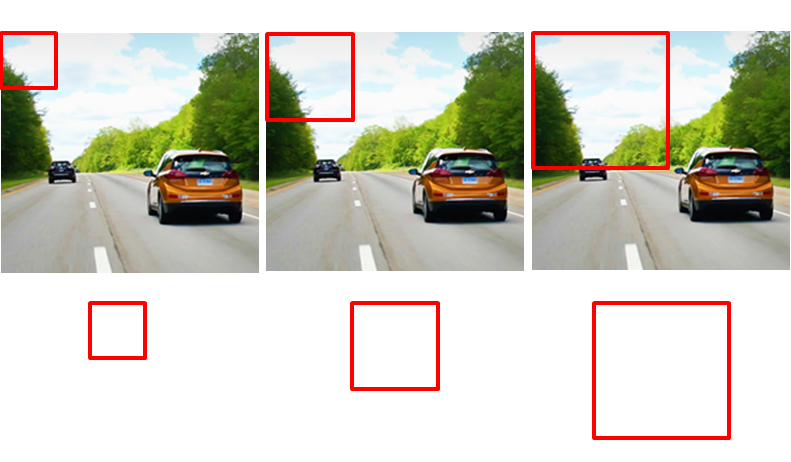


**Other improved method such as:**



*   RCNN, fast RCNN, faster RCNN
*   YOLO (you only look once)



**YOLO approach**

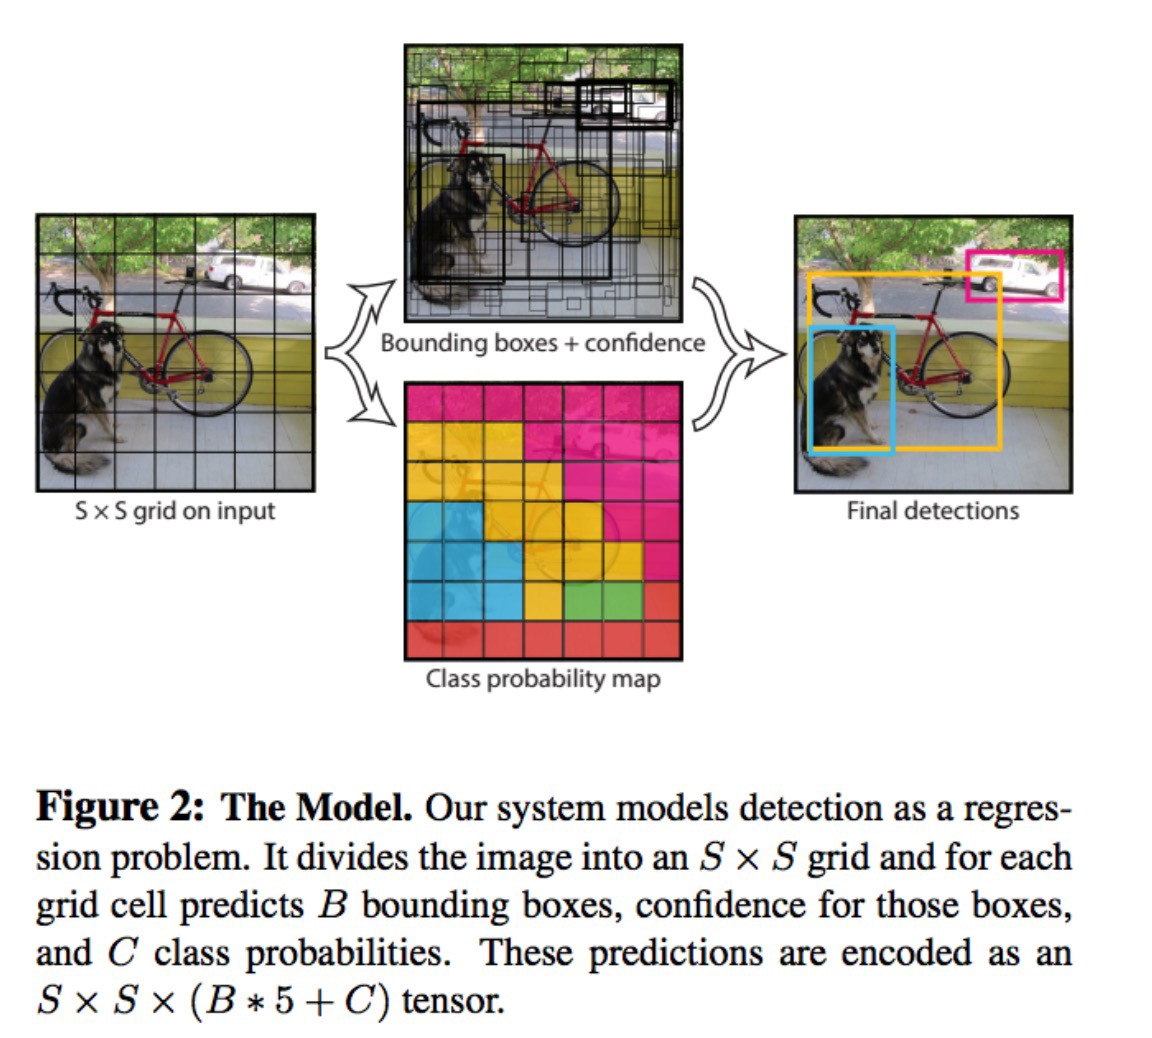

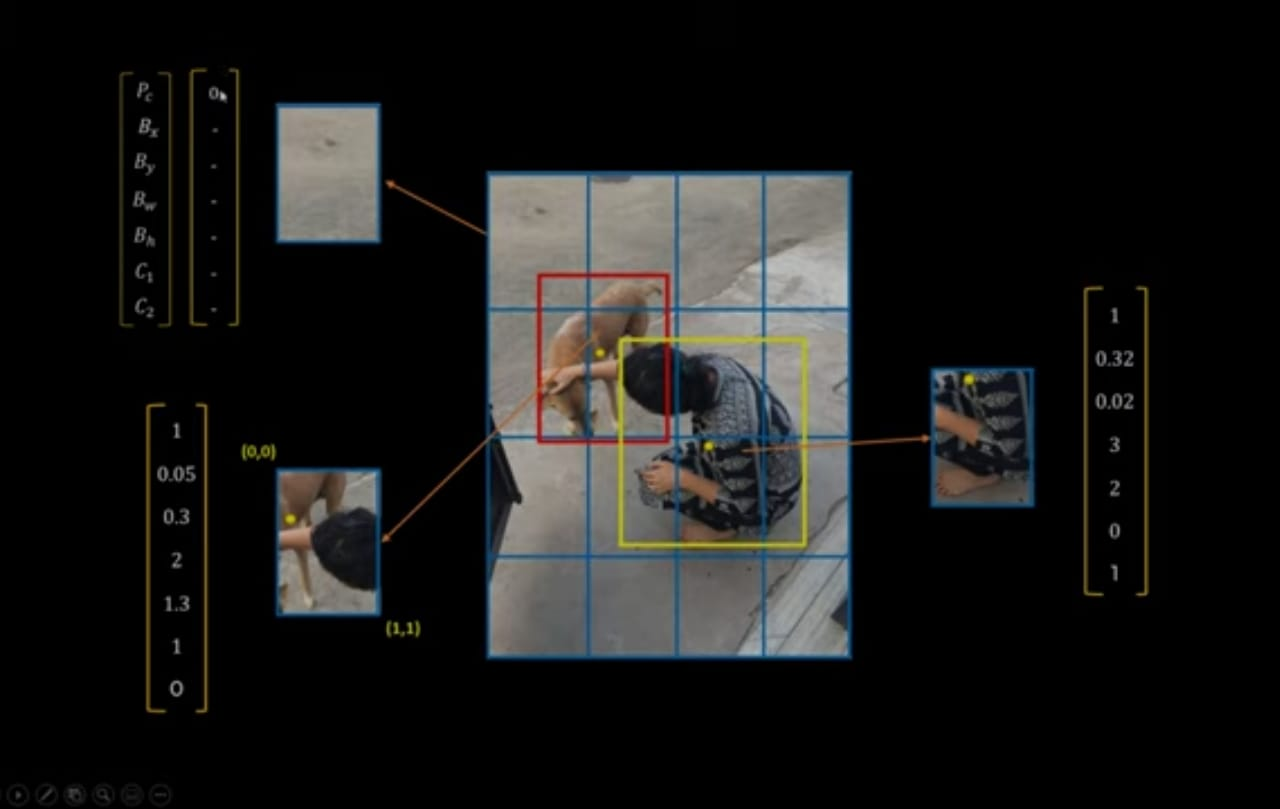

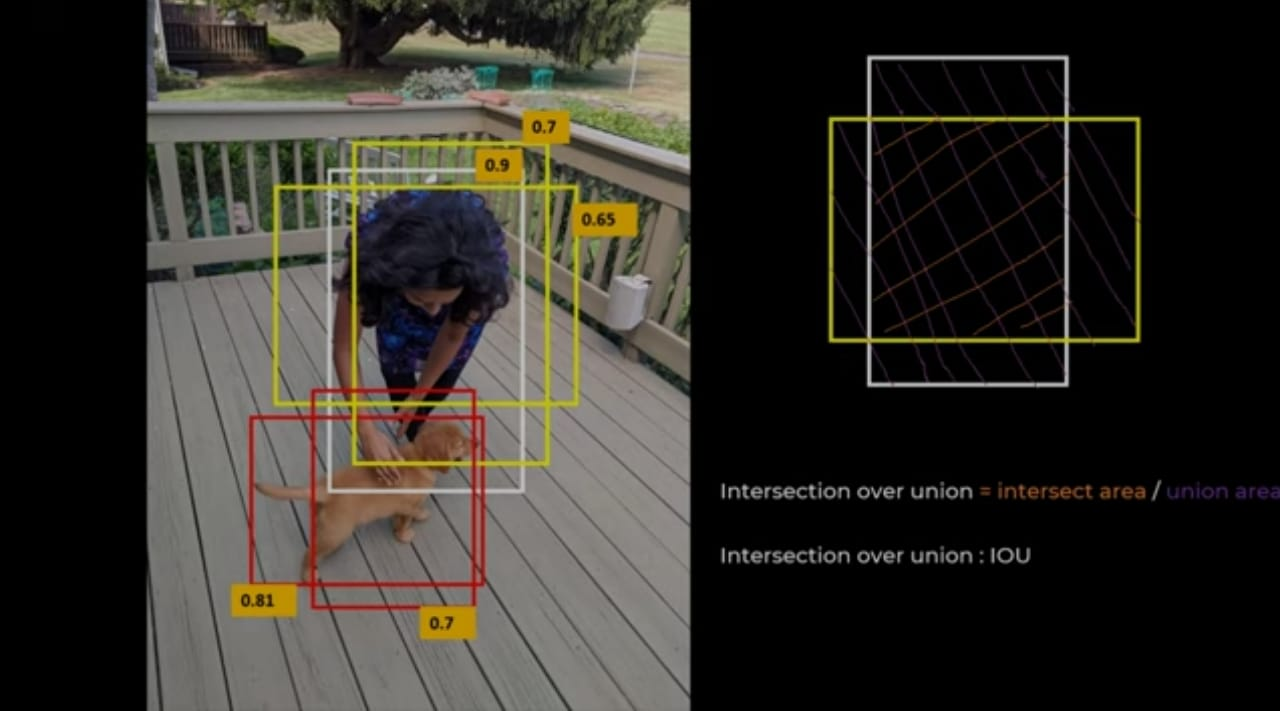

We use NON max suppression to avoid multiple bbox over single detection, by considering only box with max IOU